In [24]:
# Notebook para exploração inicial do dataset "Fireball Reports"
import numpy as np
import pandas as pd

In [25]:
df = pd.read_csv("datasets/cneos_fireball_data.csv", on_bad_lines='warn')
df.head(3)

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2023-04-15 08:22:01,20.1S,36.0E,41.4,17.2,1.6,-14.7,8.8,3.097000e+12,6.300
1,2023-04-06 14:47:39,57.4N,109.9E,31.2,22.1,8.6,3.6,-20.0,7.200000e+10,0.230
2,2023-04-01 00:02:03,16.8S,76.0E,61.8,46.4,21.4,-40.6,7.1,2.400000e+10,0.086


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Peak Brightness Date/Time (UT)       953 non-null    object 
 1   Latitude (deg.)                      763 non-null    object 
 2   Longitude (deg.)                     763 non-null    object 
 3   Altitude (km)                        495 non-null    float64
 4   Velocity (km/s)                      290 non-null    float64
 5   vx                                   290 non-null    float64
 6   vy                                   290 non-null    float64
 7   vz                                   290 non-null    float64
 8   Total Radiated Energy (J)            953 non-null    float64
 9   Calculated Total Impact Energy (kt)  953 non-null    float64
dtypes: float64(7), object(3)
memory usage: 74.6+ KB


### Medidas de Centralidade de Algumas Variáveis

#### Médias

In [27]:
df.mean(numeric_only=True)

Altitude (km)                          3.619717e+01
Velocity (km/s)                        1.801448e+01
vx                                    -4.931034e-02
vy                                    -2.196897e+00
vz                                    -7.882759e-01
Total Radiated Energy (J)              7.456390e+11
Calculated Total Impact Energy (kt)    1.215205e+00
dtype: float64

#### Medianas

In [28]:
df.median(numeric_only=True)

Altitude (km)                          3.480000e+01
Velocity (km/s)                        1.690000e+01
vx                                    -5.500000e-01
vy                                    -2.900000e+00
vz                                     1.000000e-01
Total Radiated Energy (J)              6.200000e+10
Calculated Total Impact Energy (kt)    2.000000e-01
dtype: float64

#### Modas

In [41]:
df.mode(axis=0, numeric_only=True, dropna=True)

,Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,37.0,15.2,-10.0,-12.1,-10.5,2.000000e+10,0.11
1,NaN,16.9,NaN,2.2,2.5,NaN,NaN
2,NaN,NaN,NaN,NaN,8.8,NaN,NaN


### Medidas de Dispersão de Algumas Variáveis

#### Variâncias

In [45]:
df.var(skipna=True, numeric_only=True)

Altitude (km)                          1.113536e+02
Velocity (km/s)                        3.332443e+01
vx                                     1.202169e+02
vy                                     1.277396e+02
vz                                     1.095561e+02
Total Radiated Energy (J)              1.501886e+26
Calculated Total Impact Energy (kt)    2.106559e+02
dtype: float64

#### Desvios-padrões

In [46]:
df.std(skipna=True, numeric_only=True)

Altitude (km)                          1.055242e+01
Velocity (km/s)                        5.772731e+00
vx                                     1.096435e+01
vy                                     1.130219e+01
vz                                     1.046690e+01
Total Radiated Energy (J)              1.225514e+13
Calculated Total Impact Energy (kt)    1.451399e+01
dtype: float64

### Algumas Correlações

In [48]:
df.corr(method='pearson', numeric_only=True)

,Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
Altitude (km),1.000000,0.158080,-0.042589,-0.011952,-0.058933,-0.071156,-0.078851
Velocity (km/s),0.158080,1.000000,0.042015,-0.155725,-0.166425,0.003765,0.002862
vx,-0.042589,0.042015,1.000000,-0.122349,0.001900,0.081249,0.086136
vy,-0.011952,-0.155725,-0.122349,1.000000,0.076239,-0.060104,-0.059950
vz,-0.058933,-0.166425,0.001900,0.076239,1.000000,-0.019473,-0.021706
Total Radiated Energy (J),-0.071156,0.003765,0.081249,-0.060104,-0.019473,1.000000,0.998149
Calculated Total Impact Energy (kt),-0.078851,0.002862,0.086136,-0.059950,-0.021706,0.998149,1.000000


- Correlação muito forte entre Total Radiated Energy (J) e Calculated Total Impact Energy (kt)
- Demais pares de variáveis não apresentam corrrelação entre si

<Axes: xlabel='Total Radiated Energy (J)', ylabel='Calculated Total Impact Energy (kt)'>

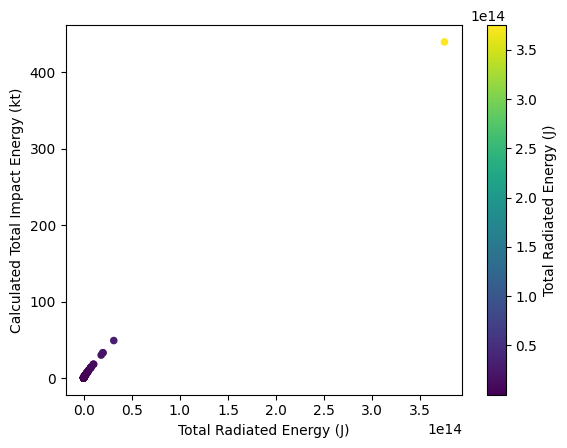

In [55]:
df.plot.scatter(x='Total Radiated Energy (J)',
                y='Calculated Total Impact Energy (kt)',
                c='Total Radiated Energy (J)',
                colormap='viridis')

### Alguns Boxplots

#### Altitude

<Axes: >

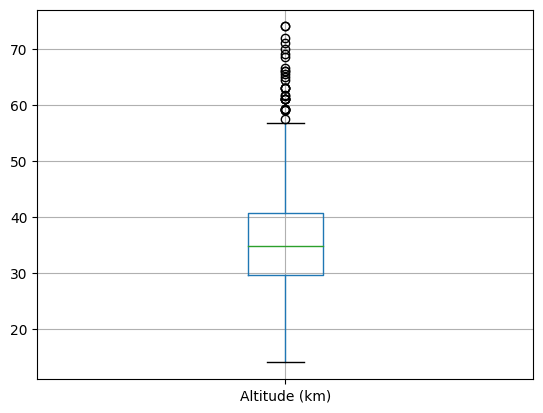

In [64]:
df.boxplot(column='Altitude (km)')

#### Velocidade e suas componentes 

<Axes: >

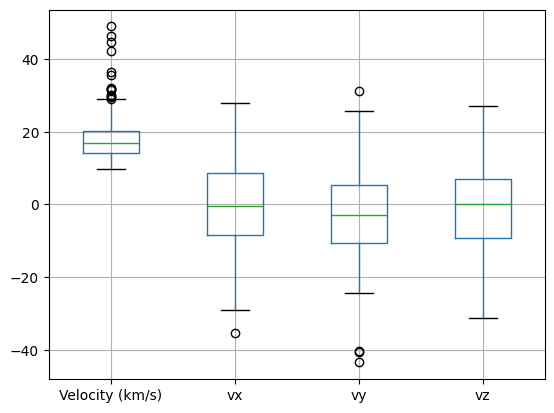

In [65]:
df.boxplot(column=['Velocity (km/s)', 'vx', 'vy', 'vz'])

#### Total Radiated Energy (J)

<Axes: >

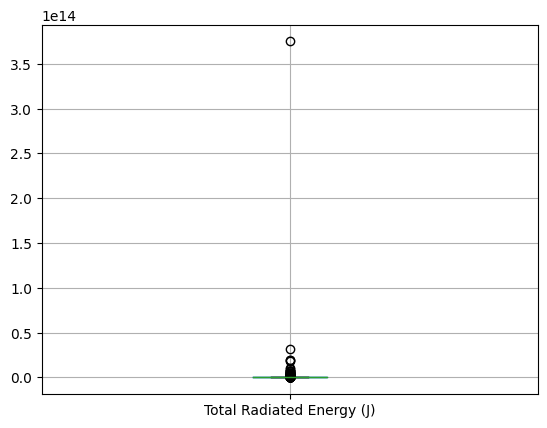

In [72]:
df.boxplot(column=['Total Radiated Energy (J)'])

In [91]:
df[df['Total Radiated Energy (J)']> 3.5e14 ] # verificar dados do outlier 

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
369,2013-02-15 03:20:33,54.8N,61.1E,23.3,18.6,12.8,-13.3,-2.4,3.750000e+14,440.0


#### Calculated Total Impact Energy (kt)

<Axes: >

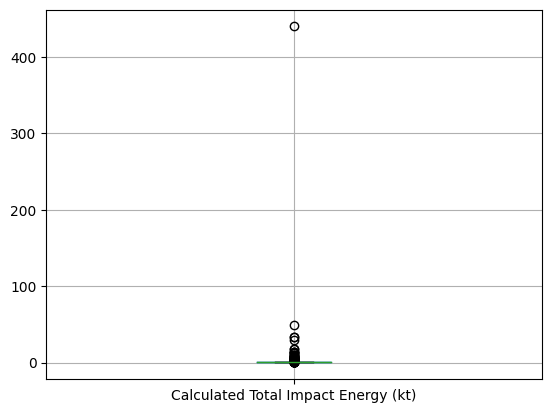

In [70]:
df.boxplot(column='Calculated Total Impact Energy (kt)')

In [75]:
df[df['Calculated Total Impact Energy (kt)']> 400] # verificar dados do outlier 

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
369,2013-02-15 03:20:33,54.8N,61.1E,23.3,18.6,12.8,-13.3,-2.4,3.750000e+14,440.0
